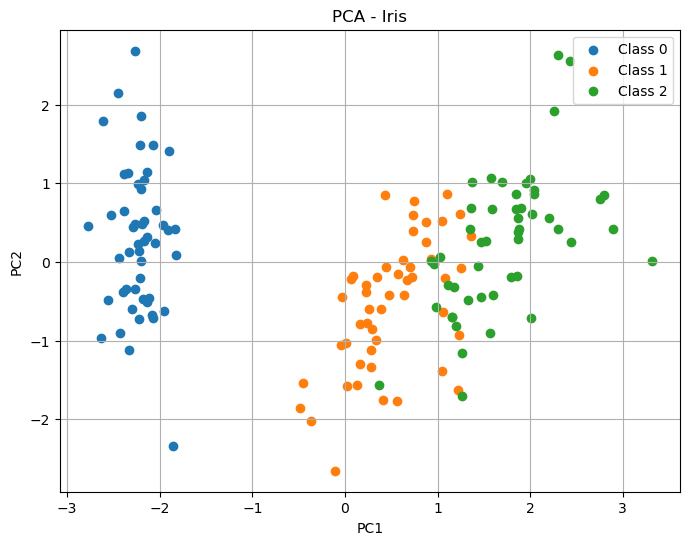

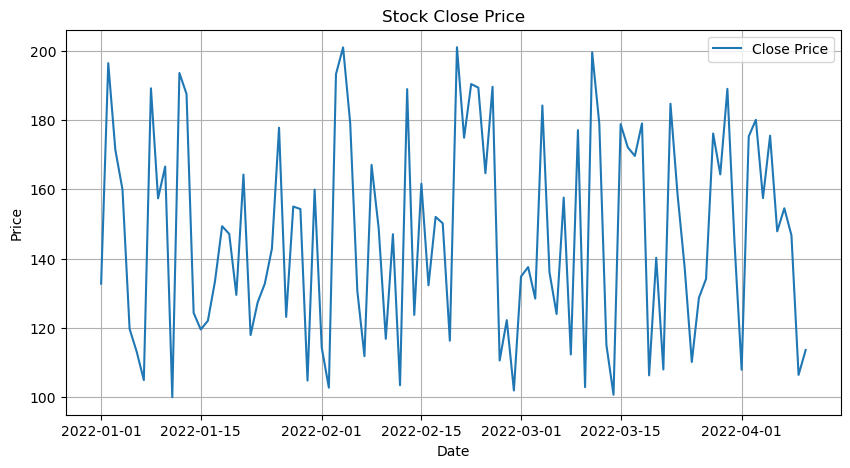

MAE: 24.68
RMSE: 30.39


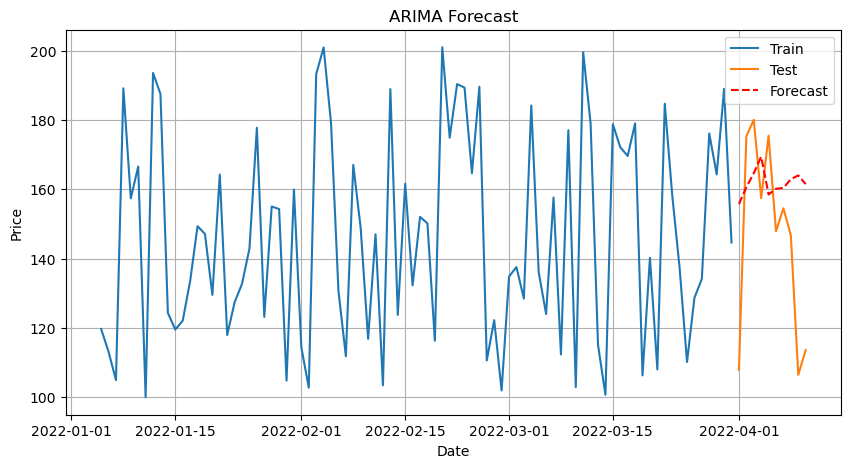

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load iris dataset
df = pd.read_csv("iris_dataset.csv")
X = df.drop(columns=["target"])
y = df["target"]

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Plot
pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_df["target"] = y

plt.figure(figsize=(8,6))
for label in pca_df["target"].unique():
    plt.scatter(pca_df[pca_df["target"] == label]["PC1"],
                pca_df[pca_df["target"] == label]["PC2"], label=f"Class {label}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Iris")
plt.legend()
plt.grid(True)
plt.show()

## PART 2: Stock Price Forecasting with ARIMA

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("stock_prices.csv", parse_dates=["Date"], index_col="Date")
df = df.asfreq("D").fillna(method="ffill")

# Plot Close price
plt.figure(figsize=(10,5))
plt.plot(df["Close"], label="Close Price")
plt.title("Stock Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Feature Engineering
df["Lag_1"] = df["Close"].shift(1)
df["MA_5"] = df["Close"].rolling(window=5).mean()
df = df.dropna()

# Train/Test Split
train = df["Close"][:-10]
test = df["Close"][-10:]

# ARIMA Model
model = ARIMA(train, order=(5,1,0))
fit = model.fit()

# Forecast
forecast = fit.forecast(steps=10)
forecast.index = test.index

# Evaluation
mae = mean_absolute_error(test, forecast)
rmse = mean_squared_error(test, forecast, squared=False)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))

# Plot
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(forecast.index, forecast, label="Forecast", linestyle="--", color="red")
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
